## Main Goal
The objective of this project is to predict the food delivery time based on the distance covered by the delivery partner to deliver the order!  

### Data Understanding
The dataset has the following features:

1. **ID**: order ID number 
2. **Delivery_person_ID**: ID number of the delivery partner
3. **Delivery_person_Age**: Age of the delivery partner
4. **Delivery_person_Ratings**: ratings of the delivery partner based on past deliveries
5. **Restaurant_latitude**: The latitude of the restaurant
6. **Restaurant_longitude**: The longitude of the restaurant
7. **Delivery_location_latitude**: The latitude of the delivery location
8. **Delivery_location_longitude**: The longitude of the delivery location
9. **Type_of_order**: The type of meal ordered by the customer
10. **Type_of_vehicle**: The type of vehicle delivery partner rides
11. **Time_taken(min)**: The time taken by the delivery partner to complete the order

The dataset can be accessed from: [https://www.kaggle.com/datasets/gauravmalik26/food-delivery-dataset/data]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
dataset = pd.read_csv("datasets/deliverytime.txt")

In [4]:
dataset.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [5]:
dataset.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

### Exploratory Data Analysis
#### What is the distribution of the target variable (Time_taken(min)), and are there any outliers or skewness in the data?

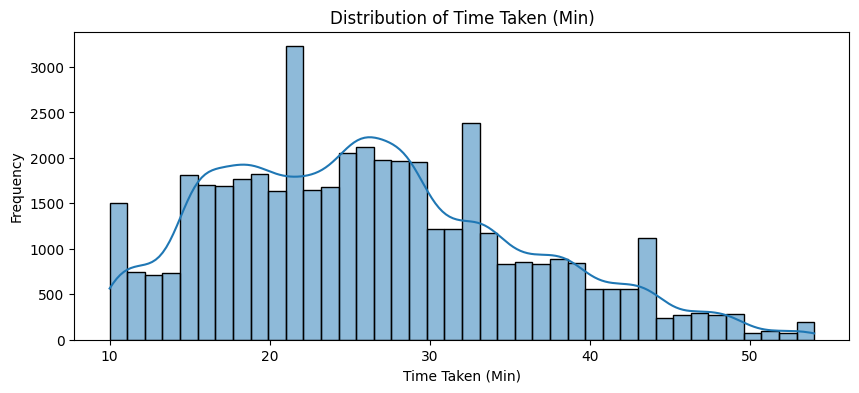

In [6]:
# Plot histogram for the target variable
plt.figure(figsize=(10, 4))
sns.histplot(data=dataset['Time_taken(min)'], kde=True, bins=40)
plt.title("Distribution of Time Taken (Min)")
plt.xlabel("Time Taken (Min)")
plt.ylabel("Frequency")
plt.show()

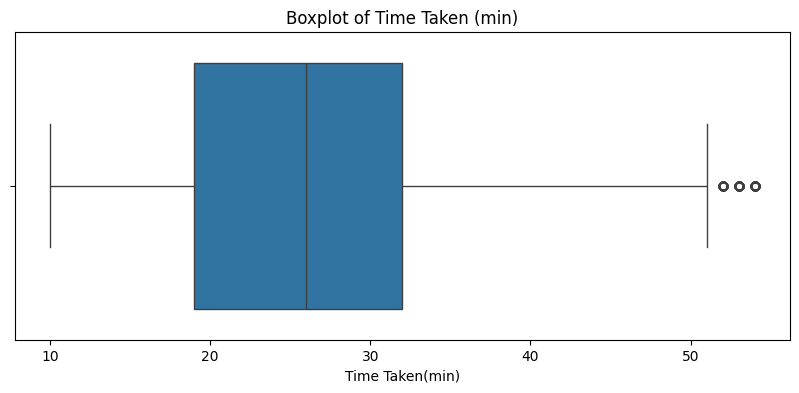

In [7]:
# Boxplot for the target variable
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Time_taken(min)'])
plt.title('Boxplot of Time Taken (min)')
plt.xlabel("Time Taken(min)")
plt.show()

> The histogram shows the data is right skewed and the boxplot shows there are few outliers!  

##### Applying logarithmic transformaton

In [8]:
# Apply logarithmic transformation to the target variable 'Time_taken(min)'
dataset['Log_Time_taken(min)'] = np.log(dataset['Time_taken(min)'] + 1) # Adding 1 to avoid log(0)

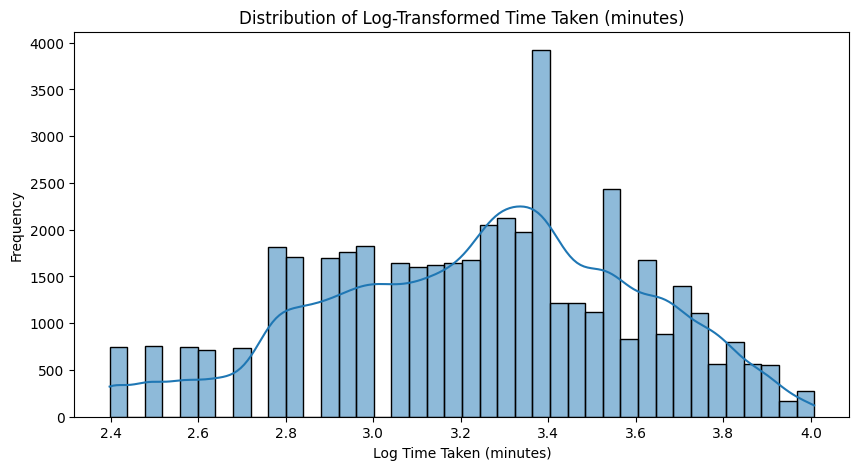

In [9]:
# Plot histogram for the transformed variable 'Log_Time_taken(min)'
plt.figure(figsize=(10, 5))
sns.histplot(dataset['Log_Time_taken(min)'], kde=True, bins=40)
plt.title('Distribution of Log-Transformed Time Taken (minutes)')
plt.xlabel('Log Time Taken (minutes)')
plt.ylabel('Frequency')
plt.show()

> The histogram's shape, while not perfectly normal, shows less skewness compared to the original distribution. This suggests that the transformation has mitigated the right skewness, leading to a more symmetrical distribution.

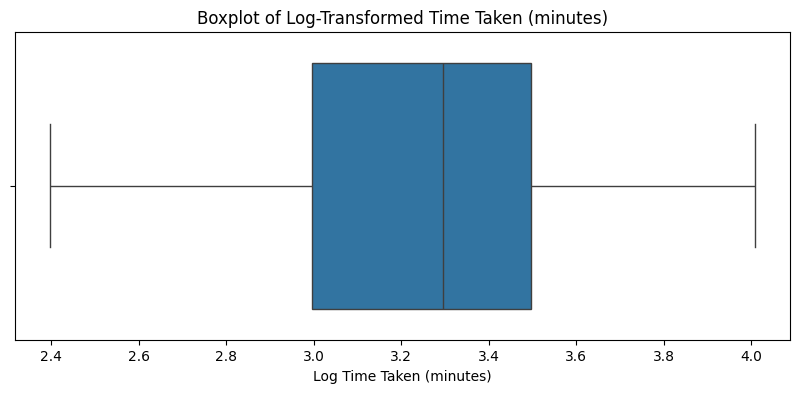

In [10]:
# Plot boxplot for the transformed variable 'Log_Time_taken(min)'
plt.figure(figsize=(10, 4))
sns.boxplot(x=dataset['Log_Time_taken(min)'])
plt.title('Boxplot of Log-Transformed Time Taken (minutes)')
plt.xlabel('Log Time Taken (minutes)')
plt.show()

> The absence of outliers in the boxplot after the transformation indicates that the extreme values in the original data have been effectively normalized!  
The median around 3.3 suggests that, on average, the log-transformed Time_taken(min) is approximately 3.3. In terms of the original scale, this corresponds to $𝑒^{3.3} ≈ 27$ minutes!  
The interquartile range (IQR), spanning from 3.0 to 3.5, represents the middle 50% of the log-transformed data. This indicates that most delivery times are within this range on the log scale!  
When back-translated to the original scale, these values are approximately $𝑒^{3.0} ≈ 20$ minutes to $𝑒^{3.5} ≈ 33$ minutes!  

#### What are the summary statistics (mean, median, standard deviation) for the delivery time, and how do these compare across different segments of the data?

In [11]:
# Summary statistics for 'Time_taken(min)'
summary_stats = dataset['Time_taken(min)'].describe()
print(summary_stats)

count    45593.000000
mean        26.294607
std          9.383806
min         10.000000
25%         19.000000
50%         26.000000
75%         32.000000
max         54.000000
Name: Time_taken(min), dtype: float64


In [12]:
# Mean, median, and standard deviation for 'Time_taken(min)' across different segments (e.g., Type_of_vehicle)
vehicle_stats = dataset.groupby('Type_of_vehicle')['Time_taken(min)'].agg(['mean', 'median', 'std'])
print(vehicle_stats)

                        mean  median       std
Type_of_vehicle                               
bicycle            26.426471    26.0  9.262855
electric_scooter   24.470110    24.0  8.610859
motorcycle         27.605674    26.0  9.647811
scooter            24.480754    24.0  8.704238


> The mean delivery time tells us the average time taken by each type of vehicle to complete a delivery. Based on the means, motorcycles have the highest average delivery time, while electric scooters and regular scooters have the lowest average delivery times.  

> The median is the middle value in the delivery time data. Half of the deliveries took less time than the median, and half took more. Here, both bicycles and motorcycles have a median delivery time of 26.0 minutes, while electric scooters and scooters have a median of 24.0 minutes.

> The standard deviation measures the variability or dispersion of the delivery times. A higher standard deviation indicates more variation in delivery times. Motorcycles have the highest standard deviation, suggesting that their delivery times are more spread out compared to other vehicles. Electric scooters have the lowest standard deviation, indicating more consistent delivery times.